# Práctica 4. Procesamiento audio
(MÍNIMO)

Ejercicio 1: Construir un identificador de notas musicales. Es decir; en su versión más sencilla  (y  suficiente) la entrada es un sonido con una sola nota musical y debe identificar cuál es. Por simplicidad  elija un único instrumento para la identificación.  


=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.A4.wav
Nota (ES): La


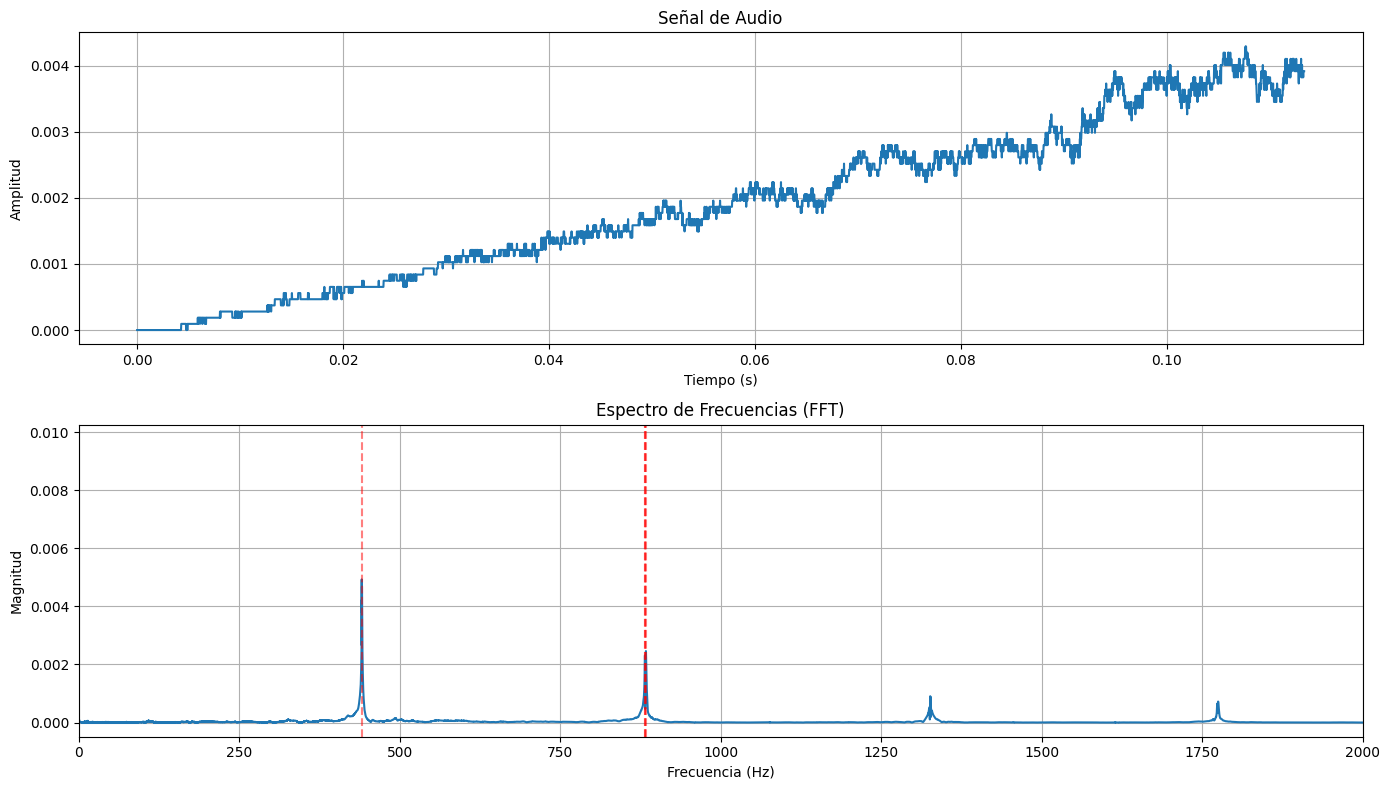

Nota principal: La (Octava 4) - 440.79 Hz
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.Ab4.wav
Nota (ES): La♭


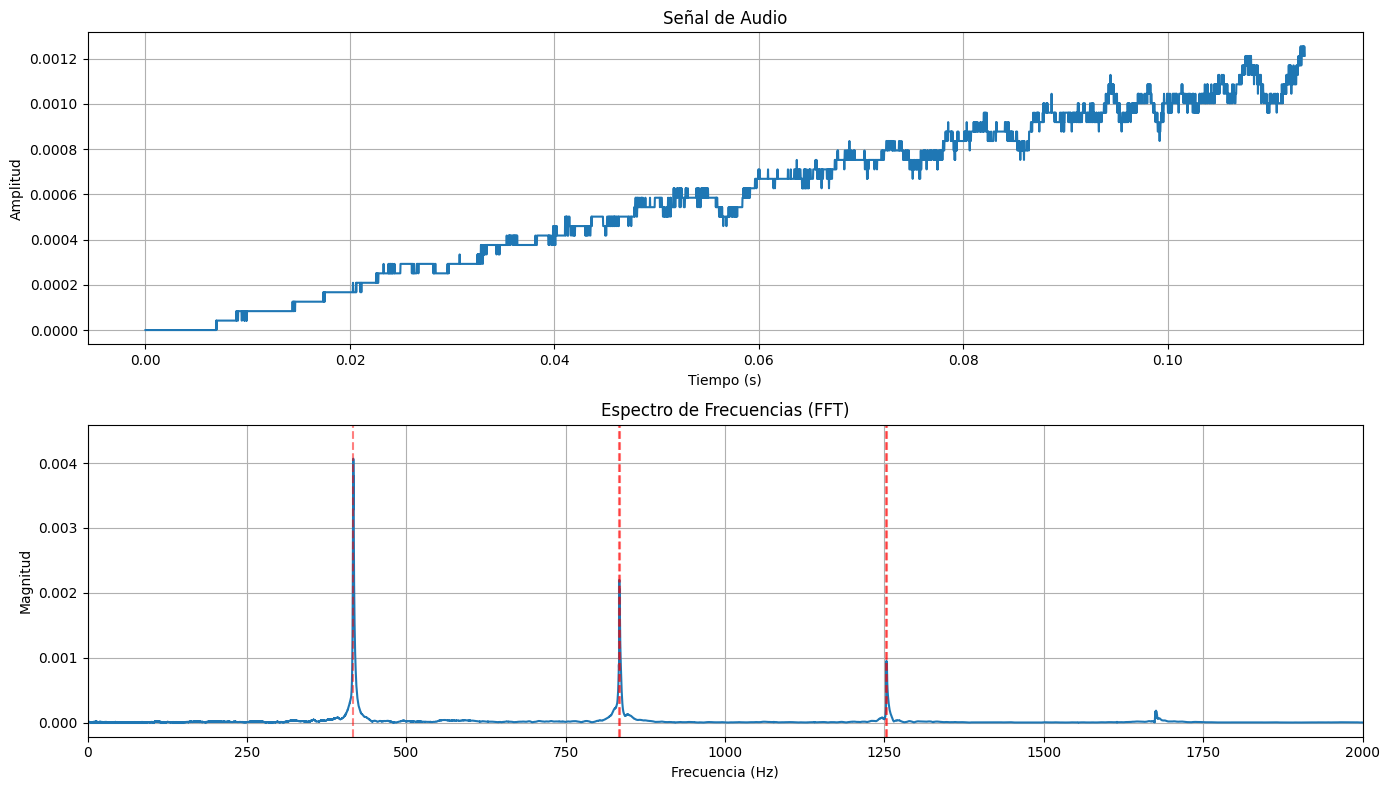

Nota principal: Sol#/Lab (Octava 4) - 416.91 Hz
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.B4.wav
Nota (ES): Si


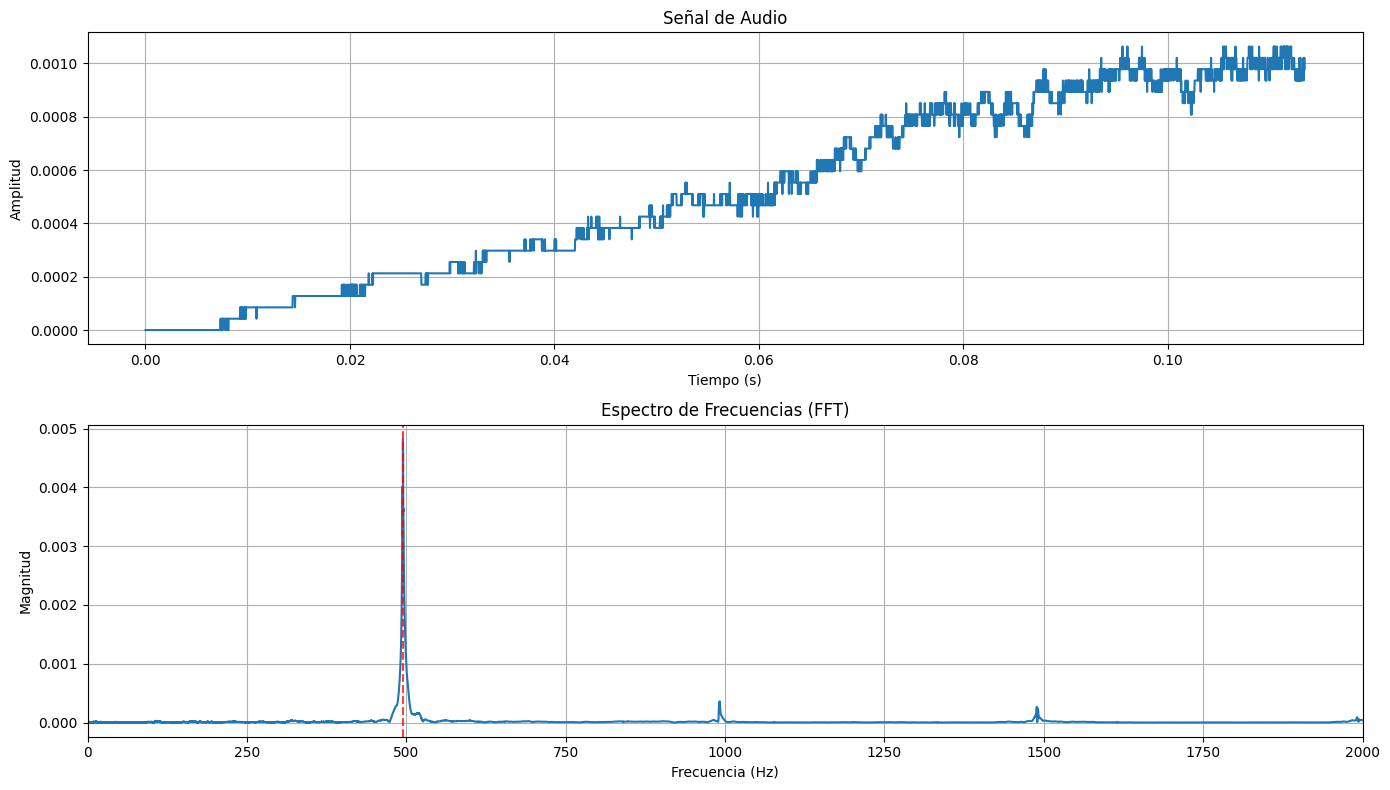

Nota principal: Si (Octava 4) - 494.76 Hz

Otras frecuencias detectadas:
  - Si (Octava 4) - 495.32 Hz

Posible acorde: Si
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.Bb4.wav
Nota (ES): Si♭


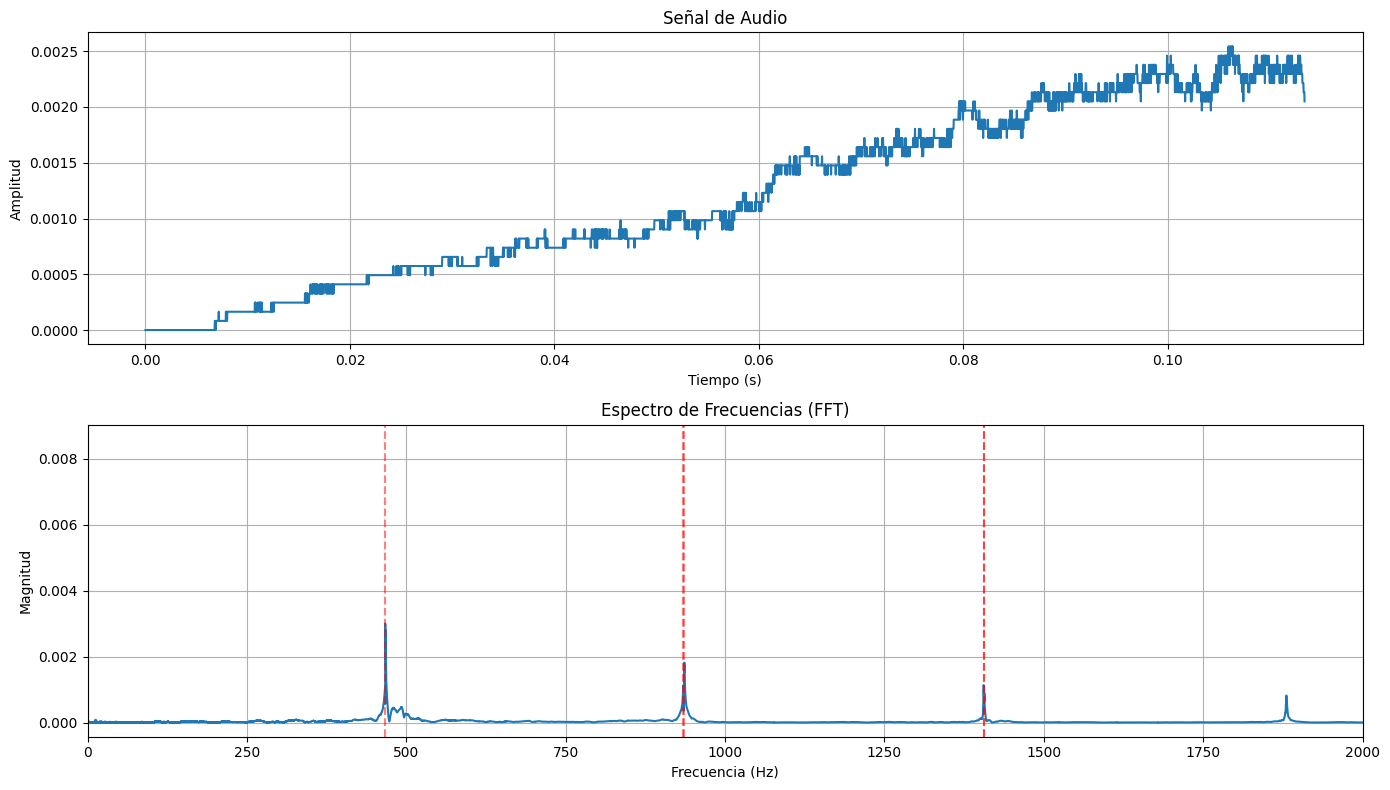

Nota principal: La#/Sib (Octava 4) - 467.03 Hz
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.C4.wav
Nota (ES): Do


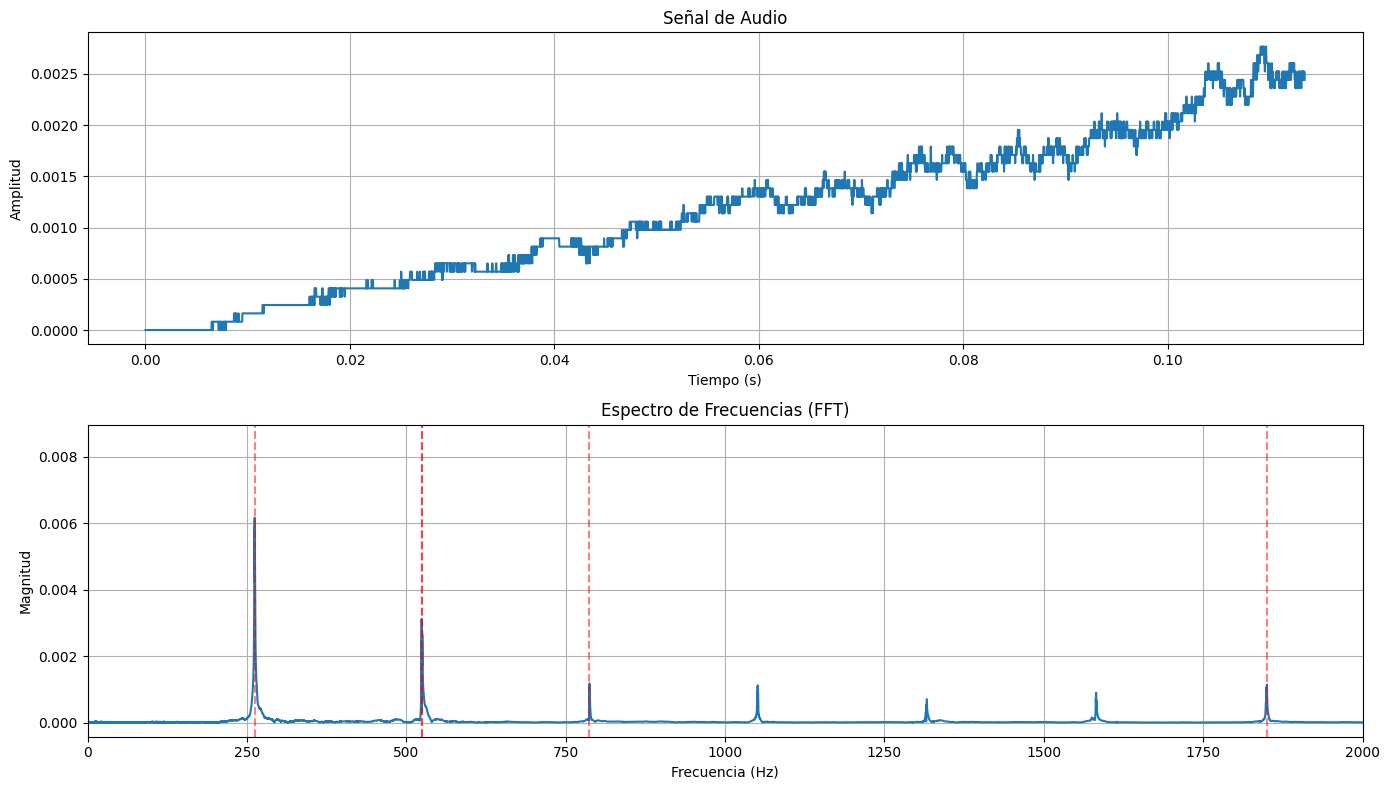

Nota principal: Do (Octava 4) - 262.17 Hz

Otras frecuencias detectadas:
  - Do (Octava 5) - 524.10 Hz
  - Do (Octava 5) - 524.76 Hz

Posible acorde: Do
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.D4.wav
Nota (ES): Re


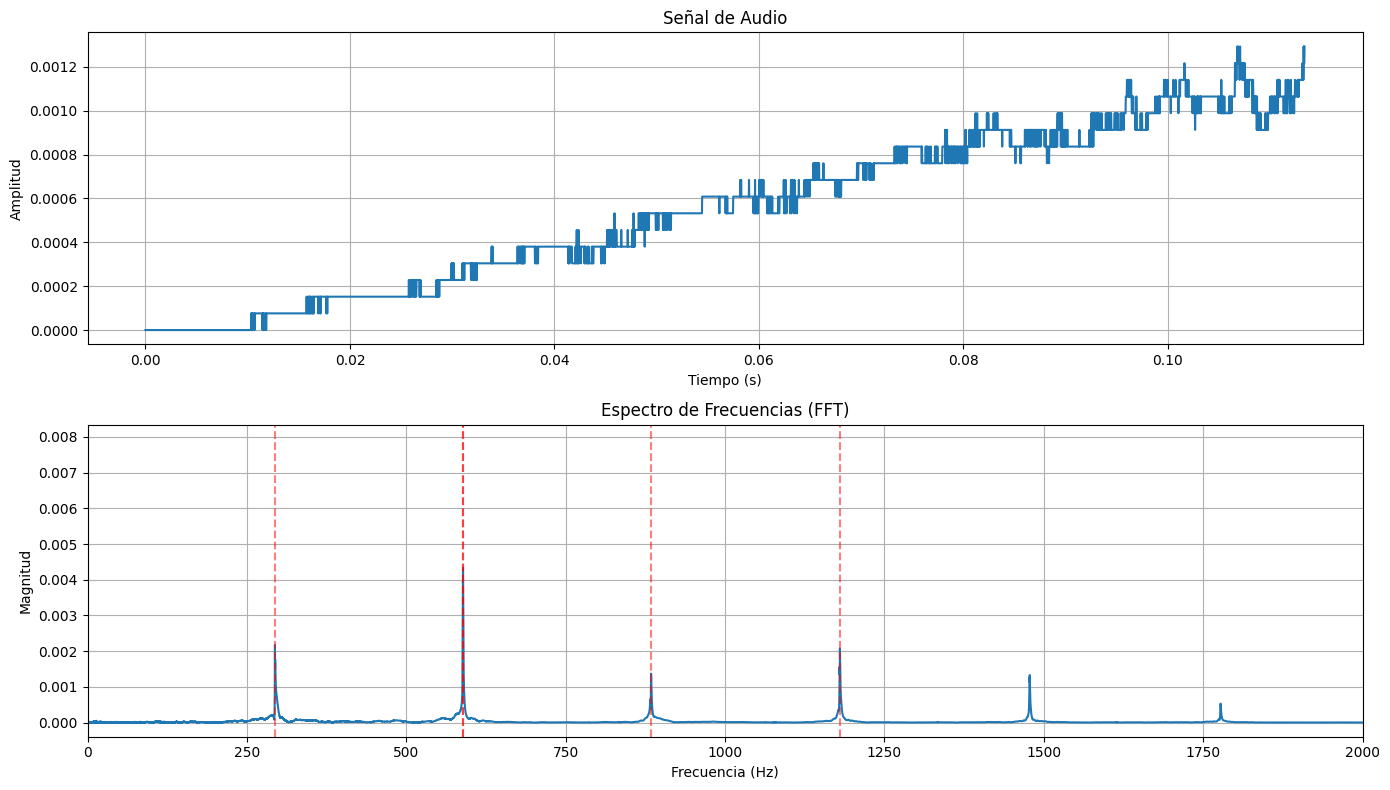

Nota principal: Re (Octava 5) - 588.99 Hz

Otras frecuencias detectadas:
  - Re (Octava 5) - 588.34 Hz
  - Re (Octava 4) - 293.99 Hz

Posible acorde: Re
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.Db4.wav
Nota (ES): Re♭


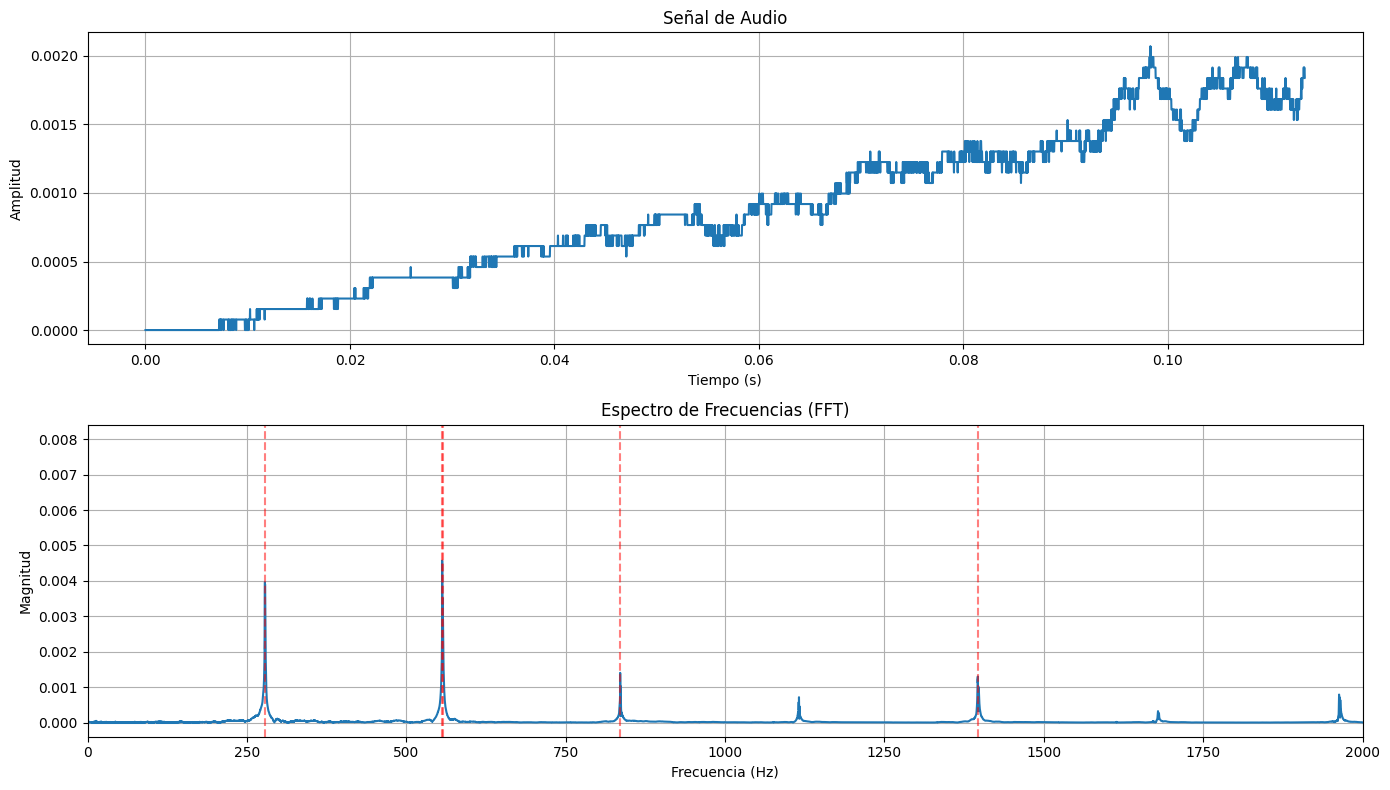

Nota principal: Do#/Reb (Octava 5) - 556.36 Hz

Otras frecuencias detectadas:
  - Do#/Reb (Octava 4) - 278.27 Hz
  - Fa (Octava 6) - 1396.50 Hz

Posible acorde: Do#/Reb + Fa
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.E4.wav
Nota (ES): Mi


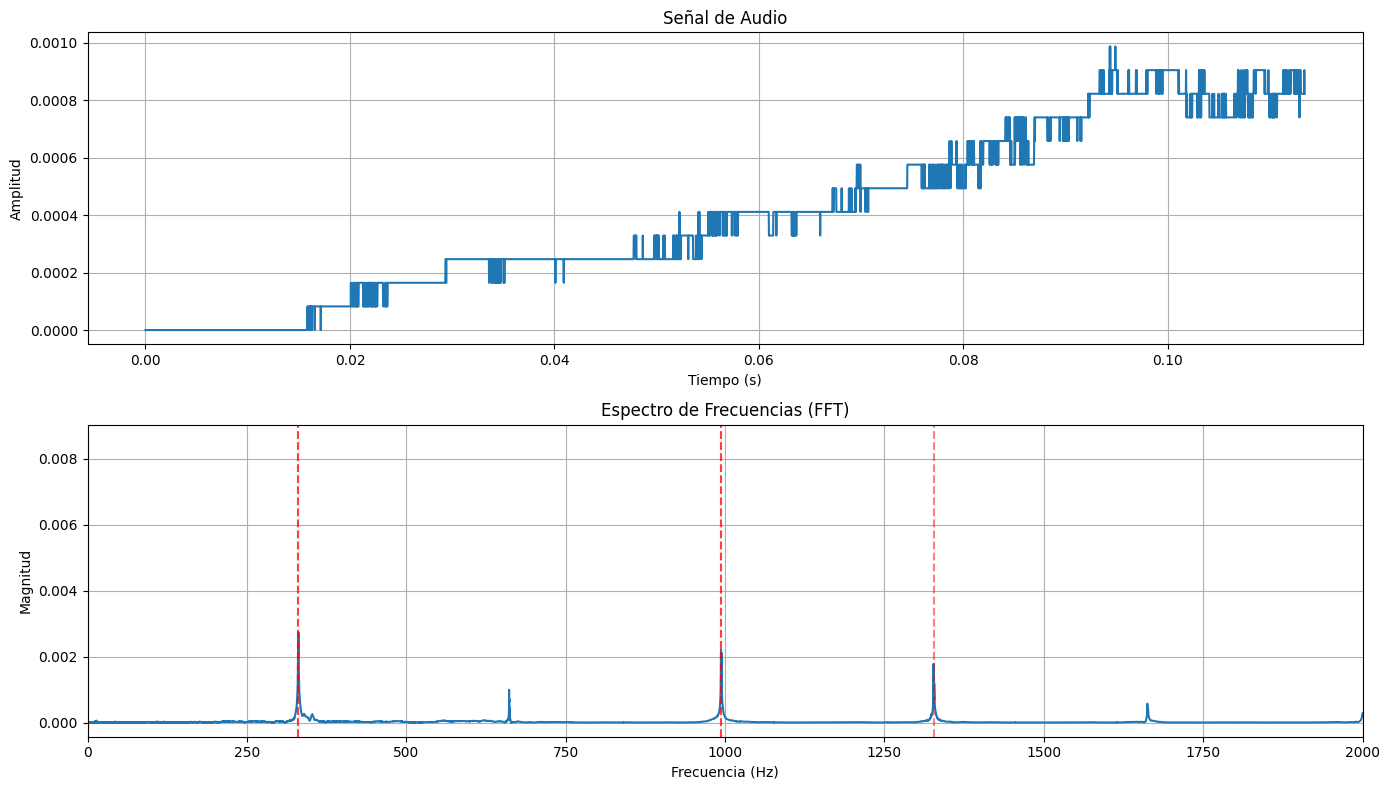

Nota principal: Mi (Octava 4) - 330.87 Hz

Otras frecuencias detectadas:
  - Mi (Octava 4) - 330.36 Hz

Posible acorde: Mi
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.Eb4.wav
Nota (ES): Mi♭


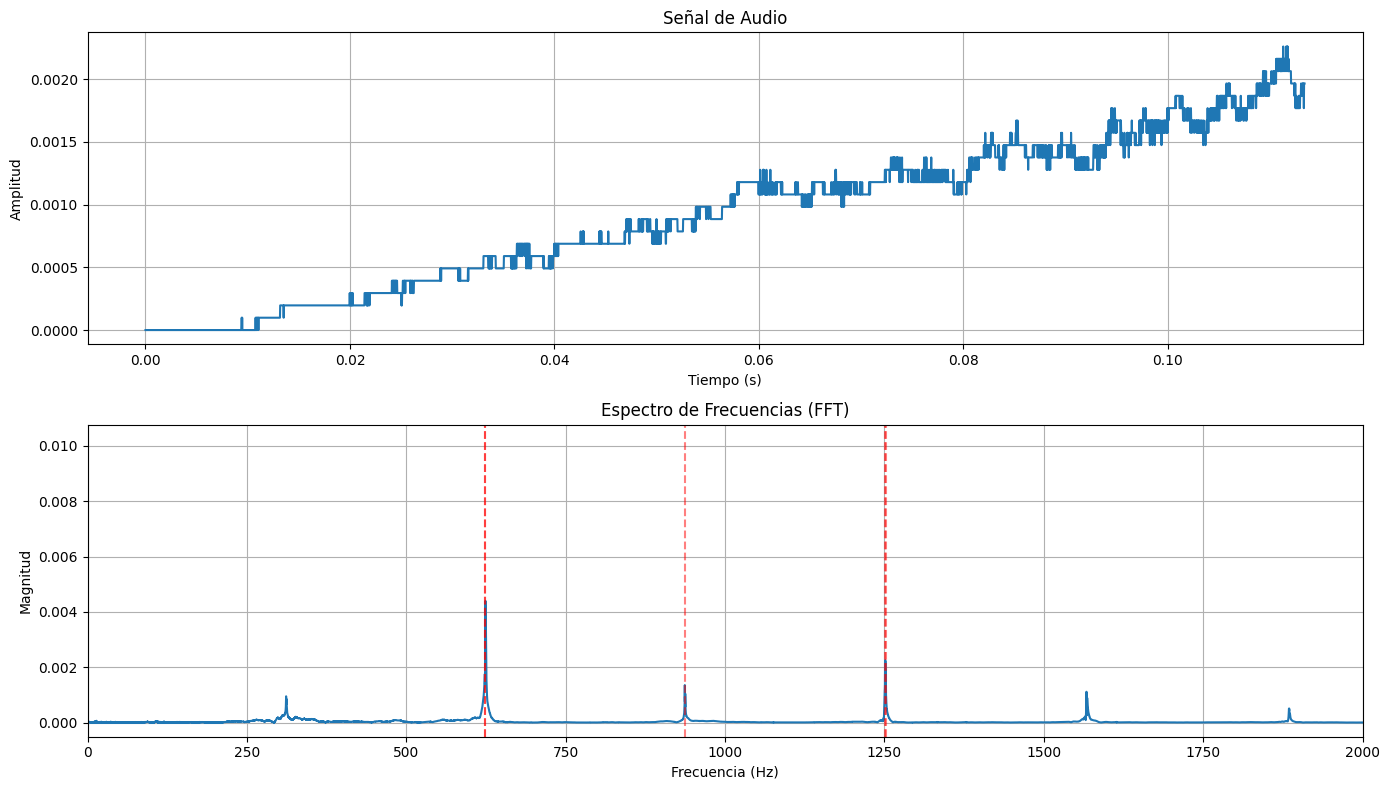

Nota principal: Re#/Mib (Octava 5) - 624.19 Hz

Otras frecuencias detectadas:
  - Re#/Mib (Octava 5) - 623.25 Hz

Posible acorde: Re#/Mib
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.F4.wav
Nota (ES): Fa


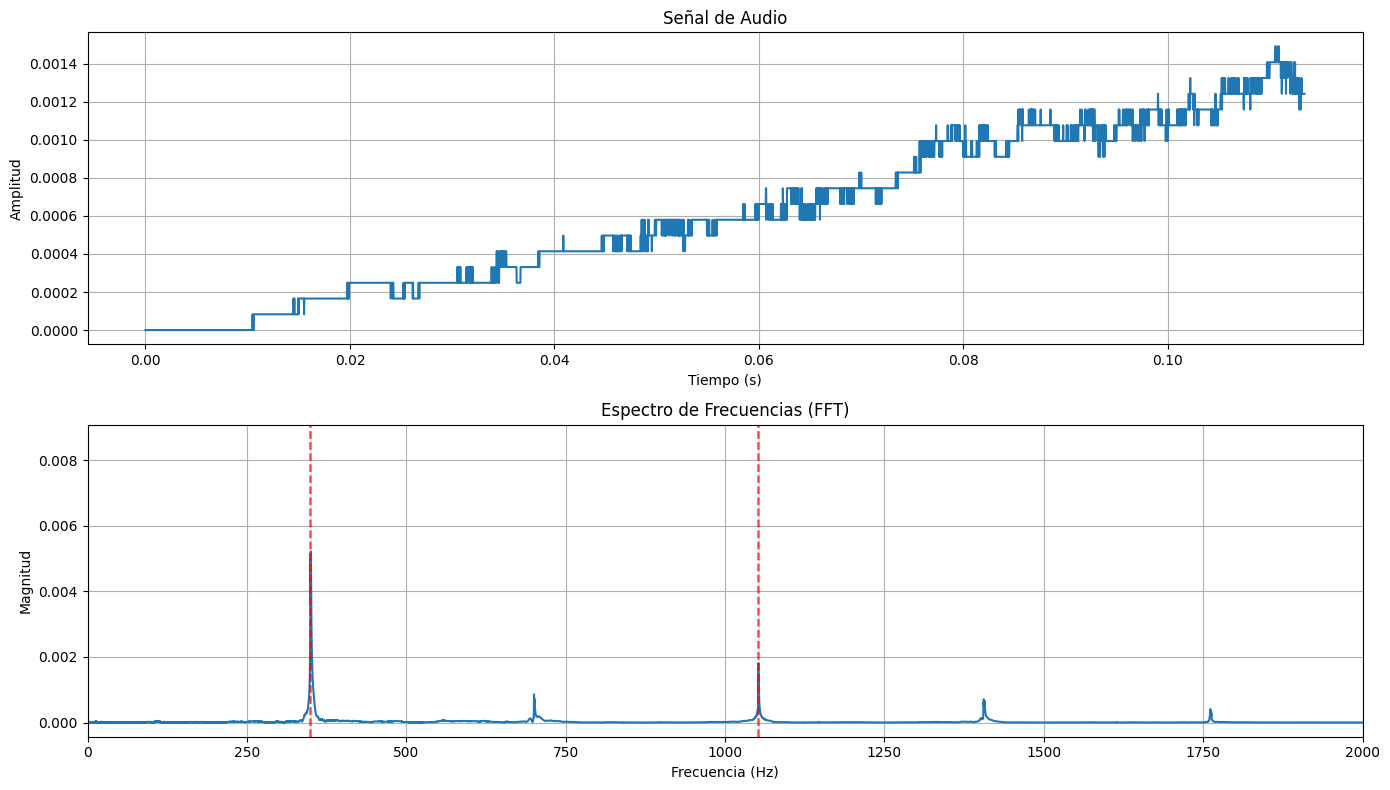

Nota principal: Fa (Octava 4) - 350.37 Hz

Otras frecuencias detectadas:
  - Fa (Octava 4) - 349.75 Hz

Posible acorde: Fa
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.G4.wav
Nota (ES): Sol


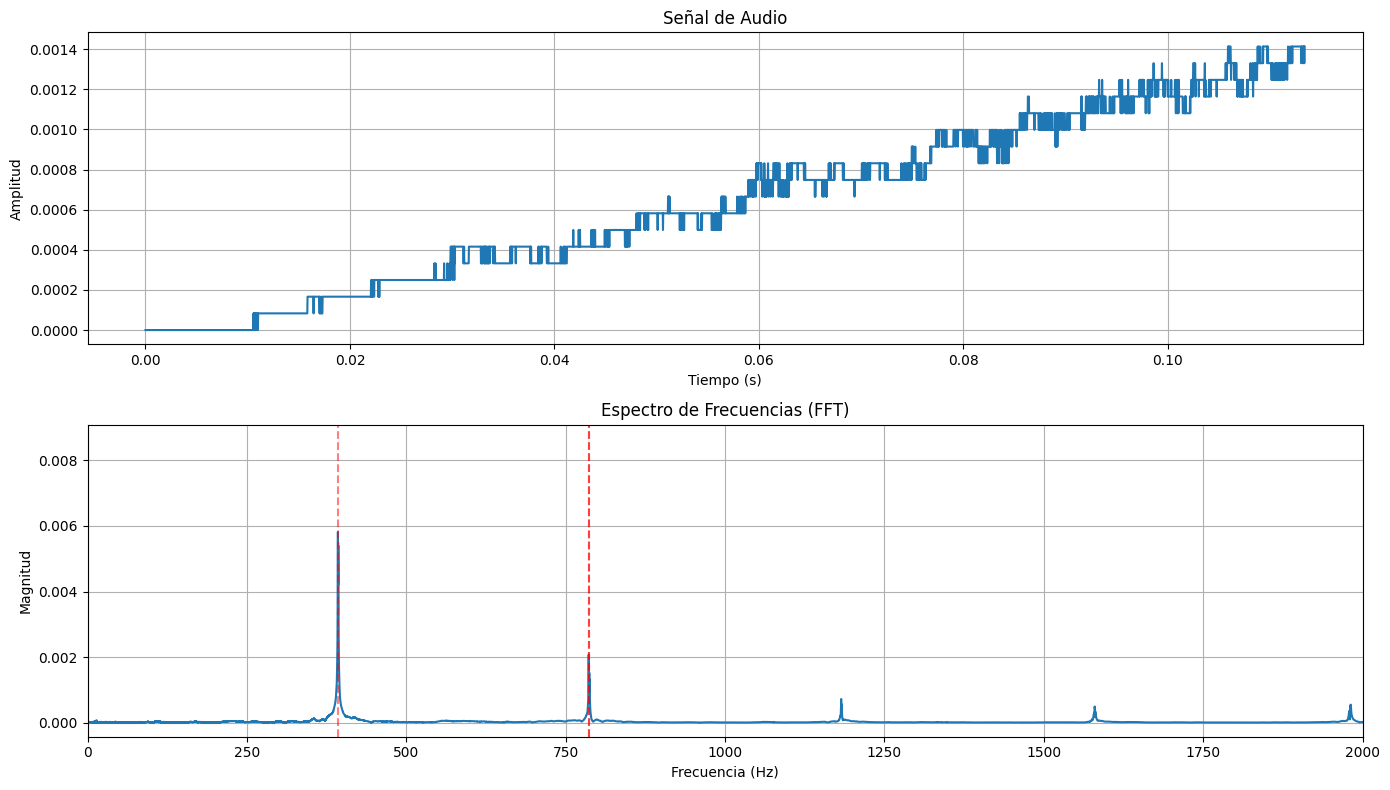

Nota principal: Sol (Octava 4) - 392.76 Hz
=== IDENTIFICADOR DE NOTAS MUSICALES ===

Procesando: data/Piano.ff.Gb4.wav
Nota (ES): Sol♭


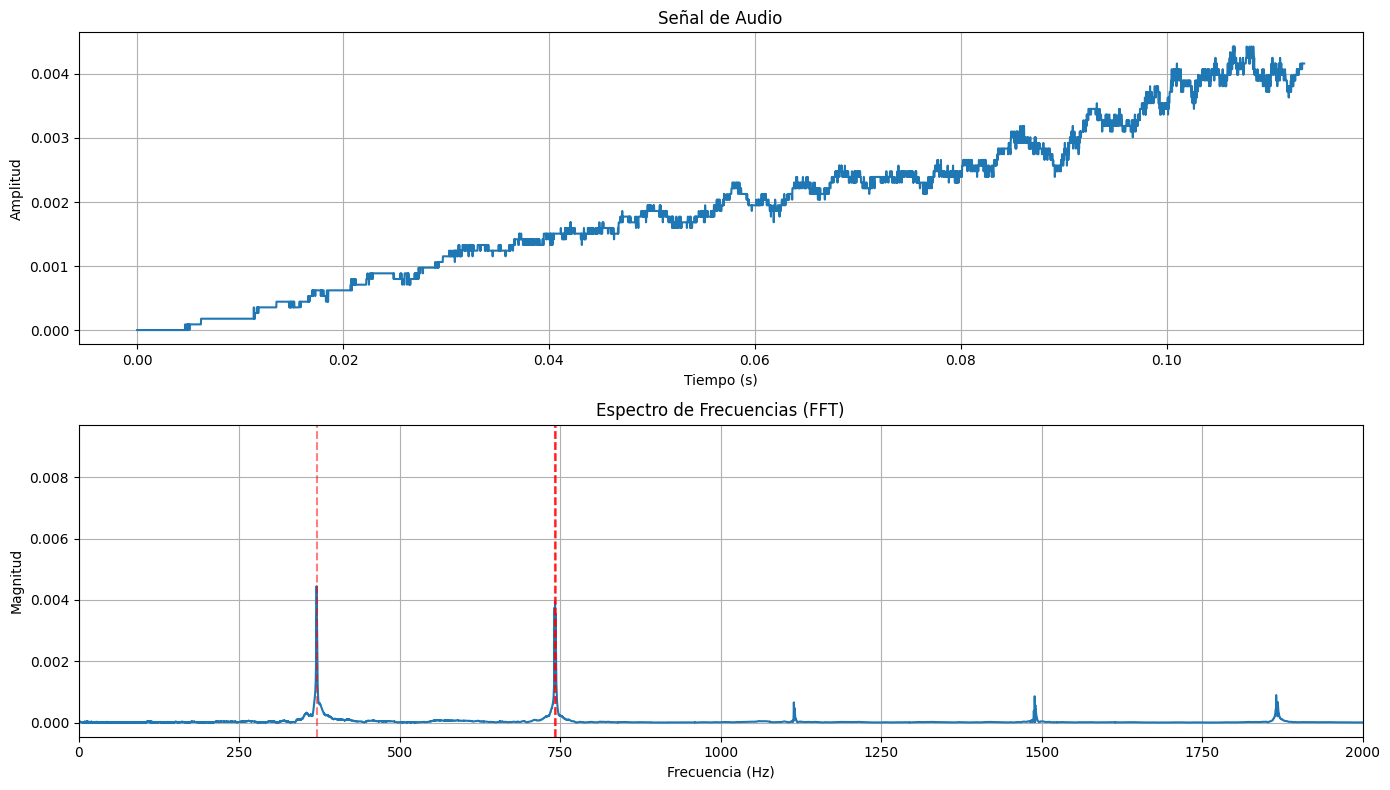

Nota principal: Fa#/Solb (Octava 4) - 370.49 Hz

Otras frecuencias detectadas:
  - Fa#/Solb (Octava 5) - 741.30 Hz

Posible acorde: Fa#/Solb


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.io import wavfile

NOTES_SPANISH = {
    'C': 'Do', 'C#': 'Do#/Reb', 'D': 'Re', 'D#': 'Re#/Mib',
    'E': 'Mi', 'F': 'Fa', 'F#': 'Fa#/Solb', 'G': 'Sol',
    'G#': 'Sol#/Lab', 'A': 'La', 'A#': 'La#/Sib', 'B': 'Si'
}

NOTE_FREQS = {
    'C0': 16.35, 'C#0': 17.32, 'D0': 18.35, 'D#0': 19.45, 'E0': 20.60, 'F0': 21.83,
    'F#0': 23.12, 'G0': 24.50, 'G#0': 25.96, 'A0': 27.50, 'A#0': 29.14, 'B0': 30.87,
    'C1': 32.70, 'C#1': 34.65, 'D1': 36.71, 'D#1': 38.89, 'E1': 41.20, 'F1': 43.65,
    'F#1': 46.25, 'G1': 49.00, 'G#1': 51.91, 'A1': 55.00, 'A#1': 58.27, 'B1': 61.74,
    'C2': 65.41, 'C#2': 69.30, 'D2': 73.42, 'D#2': 77.78, 'E2': 82.41, 'F2': 87.31,
    'F#2': 92.50, 'G2': 98.00, 'G#2': 103.83, 'A2': 110.00, 'A#2': 116.54, 'B2': 123.47,
    'C3': 130.81, 'C#3': 138.59, 'D3': 146.83, 'D#3': 155.56, 'E3': 164.81, 'F3': 174.61,
    'F#3': 185.00, 'G3': 196.00, 'G#3': 207.65, 'A3': 220.00, 'A#3': 233.08, 'B3': 246.94,
    'C4': 261.63, 'C#4': 277.18, 'D4': 293.66, 'D#4': 311.13, 'E4': 329.63, 'F4': 349.23,
    'F#4': 369.99, 'G4': 392.00, 'G#4': 415.30, 'A4': 440.00, 'A#4': 466.16, 'B4': 493.88,
    'C5': 523.25, 'C#5': 554.37, 'D5': 587.33, 'D#5': 622.25, 'E5': 659.25, 'F5': 698.46,
    'F#5': 739.99, 'G5': 783.99, 'G#5': 830.61, 'A5': 880.00, 'A#5': 932.33, 'B5': 987.77,
    'C6': 1046.50, 'C#6': 1108.73, 'D6': 1174.66, 'D#6': 1244.51, 'E6': 1318.51, 'F6': 1396.91,
    'F#6': 1479.98, 'G6': 1567.98, 'G#6': 1661.22, 'A6': 1760.00, 'A#6': 1864.66, 'B6': 1975.53,
    'C7': 2093.00, 'C#7': 2217.46, 'D7': 2349.32, 'D#7': 2489.02, 'E7': 2637.02, 'F7': 2793.83,
    'F#7': 2959.96, 'G7': 3135.96, 'G#7': 3322.44, 'A7': 3520.00, 'A#7': 3729.31, 'B7': 3951.07,
    'C8': 4186.01, 'C#8': 4434.92, 'D8': 4698.63, 'D#8': 4978.03, 'E8': 5274.04, 'F8': 5587.65,
    'F#8': 5919.91, 'G8': 6271.93, 'G#8': 6644.88, 'A8': 7040.00, 'A#8': 7458.62, 'B8': 7902.13
}

def get_note_name(note_with_octave):
    note_base = note_with_octave.rstrip('0123456789')
    octave = note_with_octave[len(note_base):]
    spanish_name = NOTES_SPANISH.get(note_base, note_base)
    return f"{spanish_name} (Octava {octave})"

def freq_to_note(freq, tolerance=2.0):
    min_diff = float('inf')
    closest_note = None
    
    for note, note_freq in NOTE_FREQS.items():
        diff = abs(freq - note_freq)
        if diff < min_diff:
            min_diff = diff
            closest_note = note
    
    if min_diff <= tolerance:
        return closest_note
    return None

def identify_note(audio_file, show_plot=True):
    sample_rate, audio_data = wavfile.read(audio_file)
    
    if len(audio_data.shape) > 1:
        audio_data = audio_data.mean(axis=1)
    
    audio_data = audio_data.astype(float)
    audio_data = audio_data / np.max(np.abs(audio_data))
    
    N = len(audio_data)
    T = 1.0 / sample_rate
    
    yf = fft(audio_data)
    xf = fftfreq(N, T)[:N//2]
    magnitude = 2.0/N * np.abs(yf[:N//2])
    
    peaks, _ = find_peaks(magnitude, height=np.max(magnitude)*0.1, distance=20)
    
    if len(peaks) == 0:
        return "No se detectaron frecuencias significativas"
    
    peak_freqs = xf[peaks]
    peak_mags = magnitude[peaks]
    
    sorted_indices = np.argsort(peak_mags)[::-1]
    top_peaks = sorted_indices[:min(5, len(sorted_indices))]
    
    detected_notes = []
    for idx in top_peaks:
        freq = peak_freqs[idx]
        if freq > 20:
            note = freq_to_note(freq)
            if note:
                detected_notes.append((note, freq, peak_mags[idx]))
    
    if show_plot:
        plt.figure(figsize=(14, 8))
        
        plt.subplot(2, 1, 1)
        time_axis = np.linspace(0, N * T, N)
        plt.plot(time_axis[:5000], audio_data[:5000])
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud')
        plt.title('Señal de Audio')
        plt.grid(True)
        
        plt.subplot(2, 1, 2)
        plt.plot(xf, magnitude)
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Magnitud')
        plt.title('Espectro de Frecuencias (FFT)')
        plt.xlim(0, 2000)
        plt.grid(True)
        
        for idx in top_peaks:
            freq = peak_freqs[idx]
            if freq > 20:
                plt.axvline(x=freq, color='r', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()
    
    if len(detected_notes) == 0:
        return "No se identificaron notas musicales"
    
    main_note = detected_notes[0]
    note_name = get_note_name(main_note[0])
    result = f"Nota principal: {note_name} - {main_note[1]:.2f} Hz"
    
    if len(detected_notes) > 1:
        result += "\n\nOtras frecuencias detectadas:"
        for note, freq, mag in detected_notes[1:]:
            note_name = get_note_name(note)
            result += f"\n  - {note_name} - {freq:.2f} Hz"
    
    return result, detected_notes

def identify_chord(audio_file, show_plot=True):
    result, detected_notes = identify_note(audio_file, show_plot)
    
    if isinstance(result, str) and "No se" in result:
        return result
    
    if len(detected_notes) <= 1:
        return result
    
    note_names = [note.rstrip('0123456789') for note, _, _ in detected_notes[:4]]
    unique_notes = []
    for note in note_names:
        if note not in unique_notes:
            unique_notes.append(note)
    
    spanish_notes = [NOTES_SPANISH.get(note, note) for note in unique_notes[:3]]
    chord_result = result + f"\n\nPosible acorde: {' + '.join(spanish_notes)}"
    
    return chord_result

if __name__ == "__main__":
    NOTE_EN_TO_ES = {
        # Naturales
        "C":  "Do",
        "D":  "Re",
        "E":  "Mi",
        "F":  "Fa",
        "G":  "Sol",
        "A":  "La",
        "B":  "Si",

        # Sostenidos (#)
        "C#": "Do♯",
        "D#": "Re♯",
        "E#": "Mi♯",
        "F#": "Fa♯",
        "G#": "Sol♯",
        "A#": "La♯",
        "B#": "Si♯",

        # Bemoles (b)
        "Cb": "Do♭",
        "Db": "Re♭",
        "Eb": "Mi♭",
        "Fb": "Fa♭",
        "Gb": "Sol♭",
        "Ab": "La♭",
        "Bb": "Si♭",
    }

    for nota in ["A", "Ab", "B", "Bb", "C", "D", "Db", "E", "Eb", "F", "G", "Gb"]:
        audio_file = f"data/Piano.ff.{nota}4.wav"
        
        print("=== IDENTIFICADOR DE NOTAS MUSICALES ===\n")
        print(f"Procesando: {audio_file}")
        
        nombre_es = NOTE_EN_TO_ES.get(nota, nota)
        print(f"Nota (ES): {nombre_es}")
        
        result = identify_chord(audio_file)
        print(result)



(APORTES ADICIONALES) 

a) El caso más sencillo es el del piano, pero se valorará que se haga con otros instrumentos como la guitarra, la trompeta...  

b) Se valorará que se identifiquen octavas de notas 

c) Identificación de acordes (complejo pero espectacular) 

d) Aportes adicionales

(MÍNIMO) 
Ejercicio 2: Construir una pequeña aplicación que permita operar con diferentes filtros (con un selector)  y trabajar con varios umbrales. (uno para los filtros pasa-bajo y pasa-alto y dos para los filtros pasa-banda  y  rechaza-banda).  Demuestre  su  funcionalidad  con  señales  ruidosas.  Muestre  en  cada  filtrado  la  señal  original y filtrada en el dominio temporal y en el dominio de la frecuencia. 



(APORTES ADICIONALES) 

(a)  Reproducir la nota ruidosa original y filtrada a través de la aplicación para comparar resultados y 
cambiar parámetros en tiempo real (o casi). 

(b)  Aportes  adicionales  (como  uso  del  micrófono,  experimentar  con  implementaciones  de  filtros  diferentes)

=== DEMOSTRACIÓN DE FILTROS DE AUDIO ===

1. FILTRO PASA-BAJO
--------------------------------------------------
Ruido añadido con nivel: 0.15
Filtro Pasa-Bajo aplicado: fc=1000 Hz


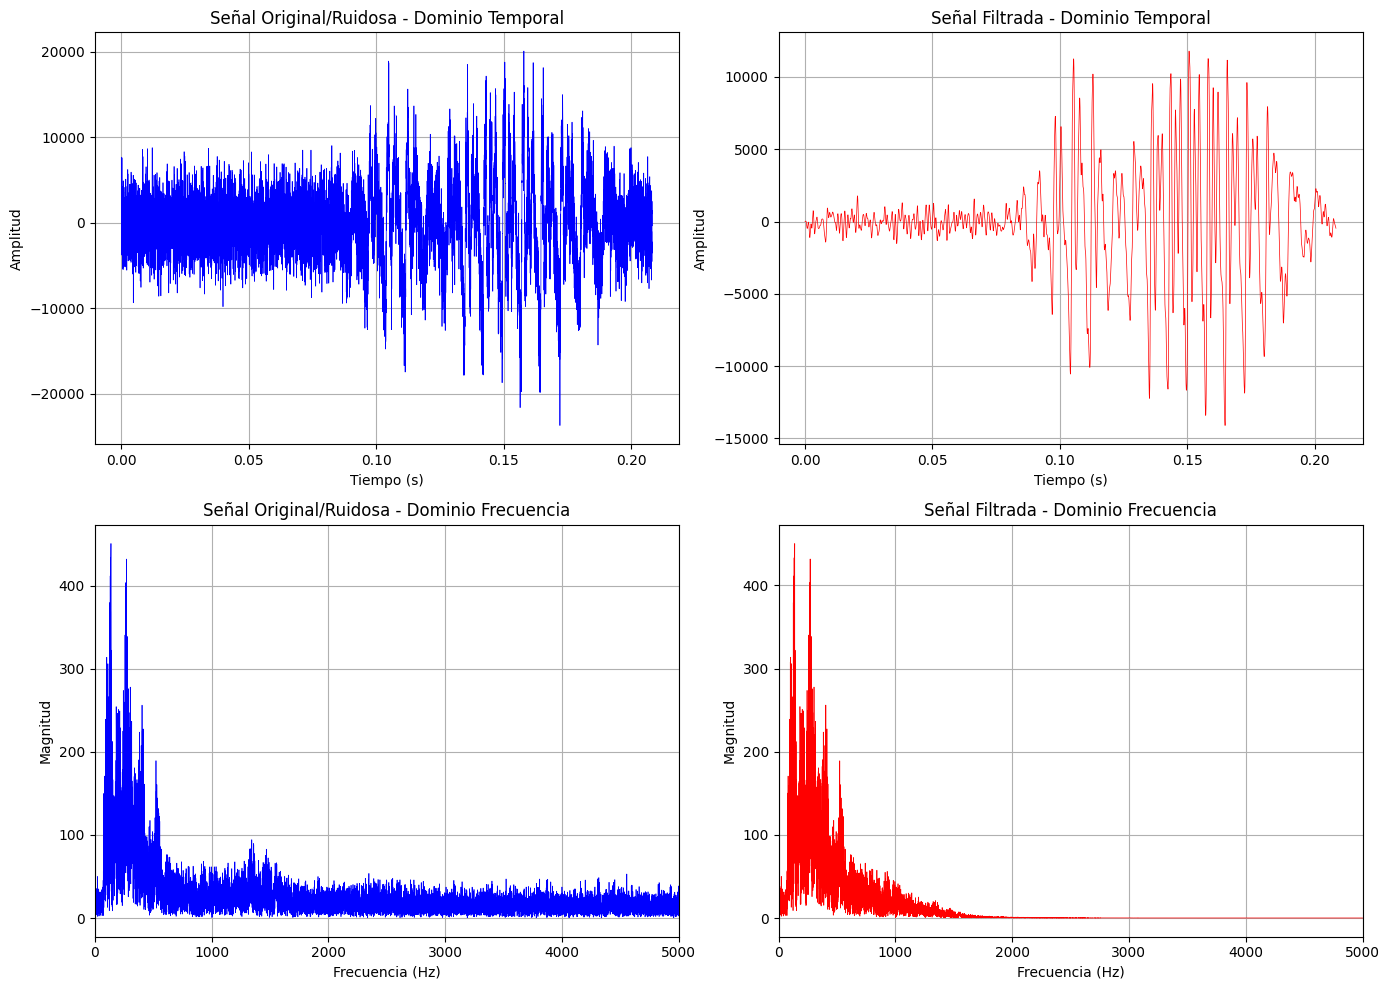

Señal ruidosa guardada: data/ruidosa.wav
Señal filtrada guardada: data/filtrada_pasobajo.wav

2. FILTRO PASA-ALTO
--------------------------------------------------
Ruido añadido con nivel: 0.15
Filtro Pasa-Alto aplicado: fc=500 Hz


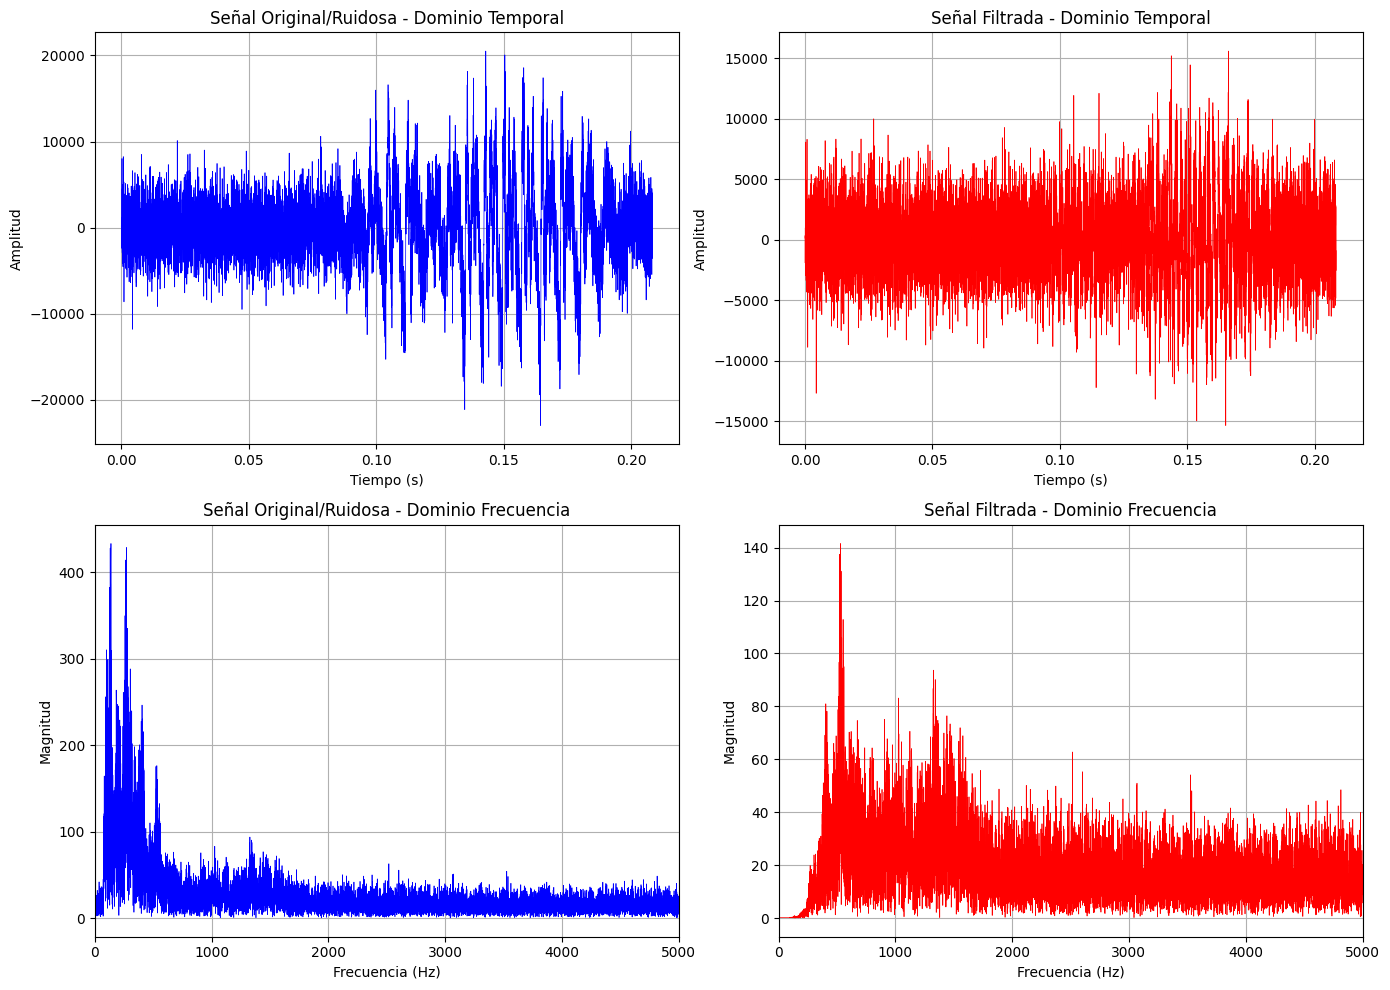

Señal ruidosa guardada: data/ruidosa.wav
Señal filtrada guardada: data/filtrada_pasoalto.wav

3. FILTRO PASA-BANDA
--------------------------------------------------
Ruido añadido con nivel: 0.15
Filtro Pasa-Banda aplicado: fc1=300 Hz, fc2=2000 Hz


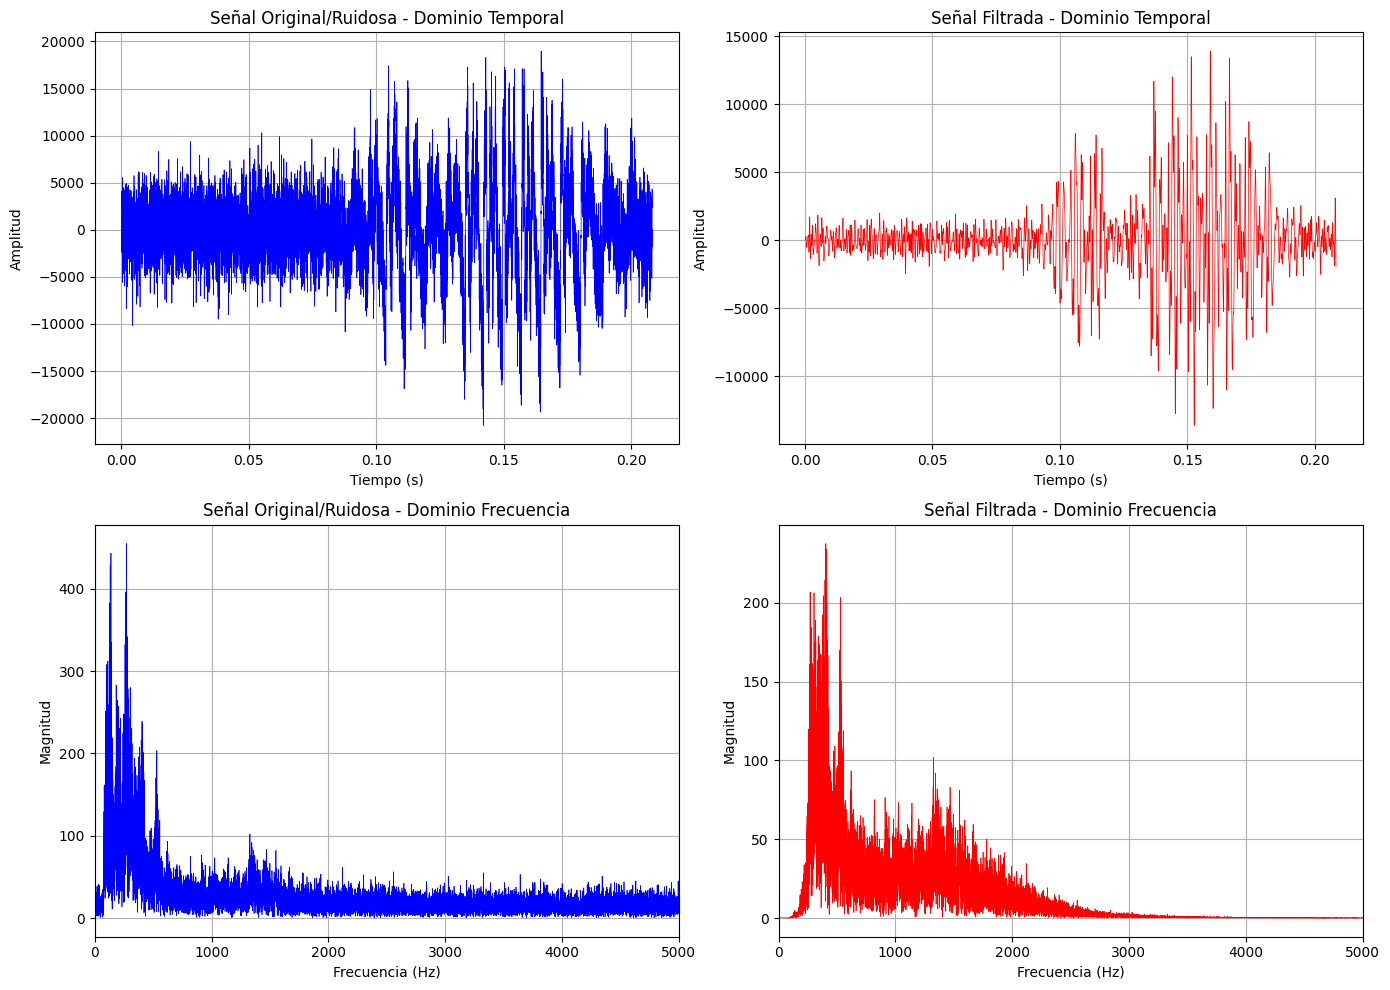

Señal ruidosa guardada: data/ruidosa.wav
Señal filtrada guardada: data/filtrada_pasobanda.wav

4. FILTRO RECHAZA-BANDA
--------------------------------------------------
Ruido añadido con nivel: 0.15
Filtro Rechaza-Banda aplicado: fc1=800 Hz, fc2=1200 Hz


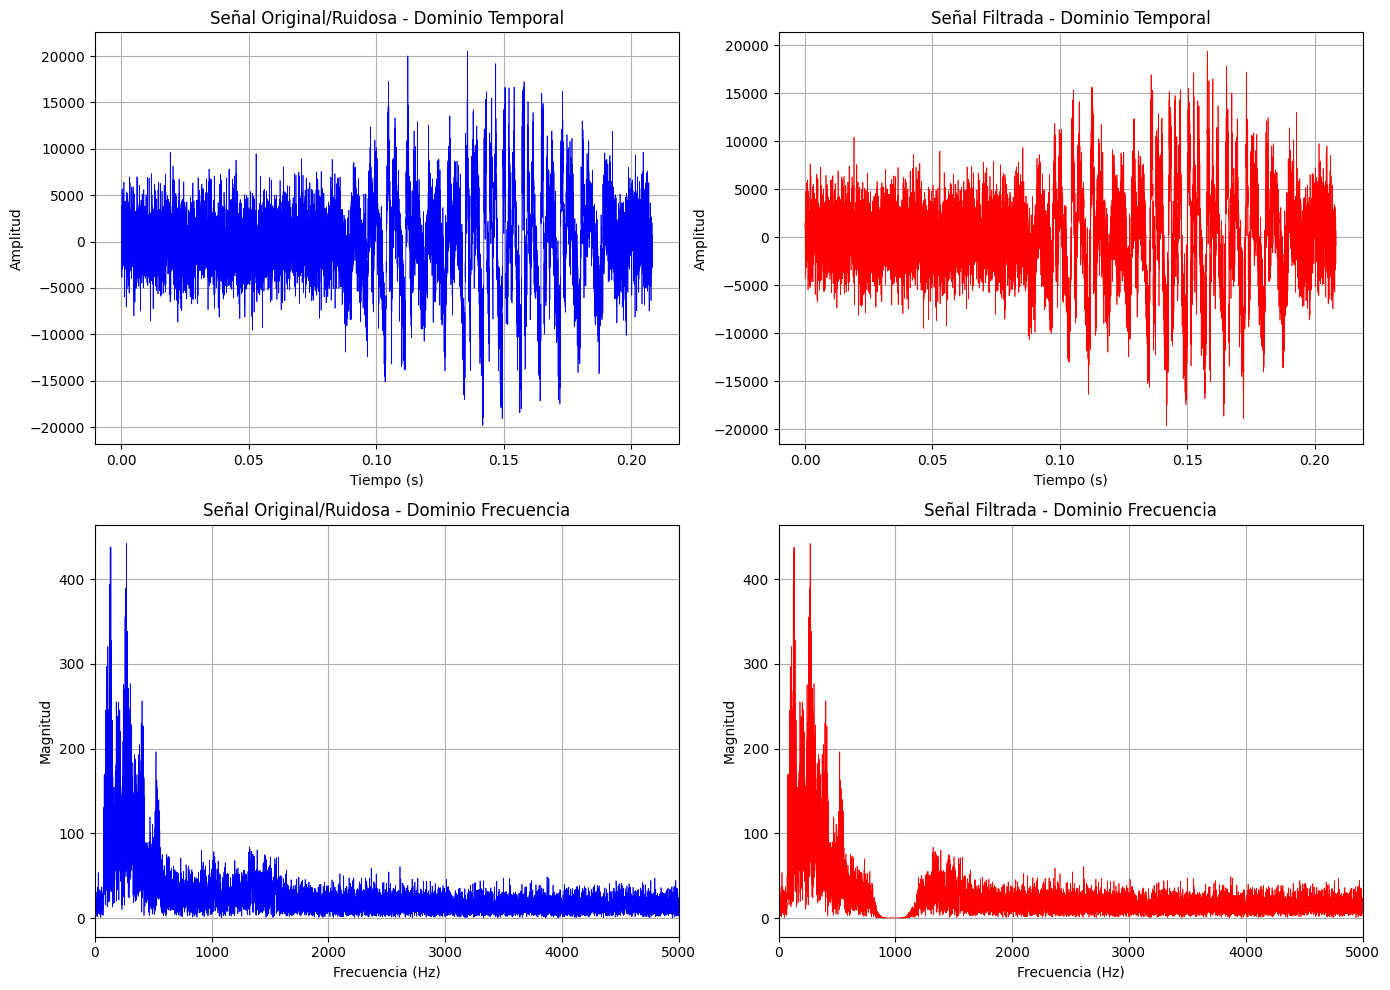

Señal ruidosa guardada: data/ruidosa.wav
Señal filtrada guardada: data/filtrada_rechazabanda.wav


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

class AudioFilterApp:
    def __init__(self, audio_file):
        self.sr, self.y = wavfile.read(audio_file)
        
        if len(self.y.shape) > 1:
            self.y = self.y.mean(axis=1)
        
        self.y = self.y.astype(float)
        self.y_ruidosa = None
        self.y_filtrada = None
        
    def add_noise(self, noise_level=0.1):
        ruido = np.random.normal(0, 1.0, self.y.shape)
        max_val = np.max(np.abs(self.y))
        self.y_ruidosa = self.y + noise_level * max_val * ruido
        print(f"Ruido añadido con nivel: {noise_level}")
        
    def butter_lowpass(self, cutoff, order=5):
        nyq = 0.5 * self.sr
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a
    
    def butter_highpass(self, cutoff, order=5):
        nyq = 0.5 * self.sr
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='high', analog=False)
        return b, a
    
    def butter_bandpass(self, lowcut, highcut, order=5):
        nyq = 0.5 * self.sr
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band', analog=False)
        return b, a
    
    def butter_bandstop(self, lowcut, highcut, order=5):
        nyq = 0.5 * self.sr
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='bandstop', analog=False)
        return b, a
    
    def apply_filter(self, filter_type='lowpass', cutoff1=1000, cutoff2=3000, order=5):
        signal = self.y_ruidosa if self.y_ruidosa is not None else self.y
        
        if filter_type == 'lowpass':
            b, a = self.butter_lowpass(cutoff1, order)
            print(f"Filtro Pasa-Bajo aplicado: fc={cutoff1} Hz")
        elif filter_type == 'highpass':
            b, a = self.butter_highpass(cutoff1, order)
            print(f"Filtro Pasa-Alto aplicado: fc={cutoff1} Hz")
        elif filter_type == 'bandpass':
            b, a = self.butter_bandpass(cutoff1, cutoff2, order)
            print(f"Filtro Pasa-Banda aplicado: fc1={cutoff1} Hz, fc2={cutoff2} Hz")
        elif filter_type == 'bandstop':
            b, a = self.butter_bandstop(cutoff1, cutoff2, order)
            print(f"Filtro Rechaza-Banda aplicado: fc1={cutoff1} Hz, fc2={cutoff2} Hz")
        else:
            raise ValueError("Tipo de filtro no válido")
        
        self.y_filtrada = lfilter(b, a, signal)
        return self.y_filtrada
    
    def plot_results(self, show_frequency=True):
        signal = self.y_ruidosa if self.y_ruidosa is not None else self.y
        
        if show_frequency:
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))
            
            samples_to_plot = min(10000, len(signal))
            time = np.arange(samples_to_plot) / self.sr
            
            axes[0, 0].plot(time, signal[:samples_to_plot], 'b-', linewidth=0.5)
            axes[0, 0].set_title('Señal Original/Ruidosa - Dominio Temporal')
            axes[0, 0].set_xlabel('Tiempo (s)')
            axes[0, 0].set_ylabel('Amplitud')
            axes[0, 0].grid(True)
            
            N = len(signal)
            yf = fft(signal)
            xf = fftfreq(N, 1/self.sr)[:N//2]
            magnitude = 2.0/N * np.abs(yf[:N//2])
            
            axes[1, 0].plot(xf, magnitude, 'b-', linewidth=0.5)
            axes[1, 0].set_title('Señal Original/Ruidosa - Dominio Frecuencia')
            axes[1, 0].set_xlabel('Frecuencia (Hz)')
            axes[1, 0].set_ylabel('Magnitud')
            axes[1, 0].set_xlim(0, min(5000, self.sr/2))
            axes[1, 0].grid(True)
            
            if self.y_filtrada is not None:
                axes[0, 1].plot(time, self.y_filtrada[:samples_to_plot], 'r-', linewidth=0.5)
                axes[0, 1].set_title('Señal Filtrada - Dominio Temporal')
                axes[0, 1].set_xlabel('Tiempo (s)')
                axes[0, 1].set_ylabel('Amplitud')
                axes[0, 1].grid(True)
                
                N = len(self.y_filtrada)
                yf = fft(self.y_filtrada)
                xf = fftfreq(N, 1/self.sr)[:N//2]
                magnitude = 2.0/N * np.abs(yf[:N//2])
                
                axes[1, 1].plot(xf, magnitude, 'r-', linewidth=0.5)
                axes[1, 1].set_title('Señal Filtrada - Dominio Frecuencia')
                axes[1, 1].set_xlabel('Frecuencia (Hz)')
                axes[1, 1].set_ylabel('Magnitud')
                axes[1, 1].set_xlim(0, min(5000, self.sr/2))
                axes[1, 1].grid(True)
            
            plt.tight_layout()
        else:
            plt.figure(figsize=(12, 8))
            
            plt.subplot(3, 1, 1)
            plt.plot(self.y[:10000])
            plt.title('Señal Original')
            plt.ylabel('Amplitud')
            plt.grid(True)
            
            plt.subplot(3, 1, 2)
            plt.plot(signal[:10000])
            plt.title('Señal con Ruido')
            plt.ylabel('Amplitud')
            plt.grid(True)
            
            if self.y_filtrada is not None:
                plt.subplot(3, 1, 3)
                plt.plot(self.y_filtrada[:10000])
                plt.title('Señal Filtrada')
                plt.xlabel('Muestras')
                plt.ylabel('Amplitud')
                plt.grid(True)
            
            plt.tight_layout()
        
        plt.show()
    
    def save_audio(self, output_noisy='senalruidosa.wav', output_filtered='senalruidosa_filtrado.wav'):
        if self.y_ruidosa is not None:
            y_noisy_normalized = np.int16(self.y_ruidosa / np.max(np.abs(self.y_ruidosa)) * 32767)
            wavfile.write(output_noisy, self.sr, y_noisy_normalized)
            print(f"Señal ruidosa guardada: {output_noisy}")
        
        if self.y_filtrada is not None:
            y_filtered_normalized = np.int16(self.y_filtrada / np.max(np.abs(self.y_filtrada)) * 32767)
            wavfile.write(output_filtered, self.sr, y_filtered_normalized)
            print(f"Señal filtrada guardada: {output_filtered}")


def demo_filtros():
    audio_file = 'data/senalruidosa.wav'
    
    print("=== DEMOSTRACIÓN DE FILTROS DE AUDIO ===\n")
    
    print("1. FILTRO PASA-BAJO")
    print("-" * 50)
    app = AudioFilterApp(audio_file)
    app.add_noise(noise_level=0.15)
    app.apply_filter(filter_type='lowpass', cutoff1=1000, order=5)
    app.plot_results(show_frequency=True)
    app.save_audio('data/ruidosa.wav', 'data/filtrada_pasobajo.wav')
    
    print("\n2. FILTRO PASA-ALTO")
    print("-" * 50)
    app2 = AudioFilterApp(audio_file)
    app2.add_noise(noise_level=0.15)
    app2.apply_filter(filter_type='highpass', cutoff1=500, order=5)
    app2.plot_results(show_frequency=True)
    app2.save_audio('data/ruidosa.wav', 'data/filtrada_pasoalto.wav')
    
    print("\n3. FILTRO PASA-BANDA")
    print("-" * 50)
    app3 = AudioFilterApp(audio_file)
    app3.add_noise(noise_level=0.15)
    app3.apply_filter(filter_type='bandpass', cutoff1=300, cutoff2=2000, order=5)
    app3.plot_results(show_frequency=True)
    app3.save_audio('data/ruidosa.wav', 'data/filtrada_pasobanda.wav')
    
    print("\n4. FILTRO RECHAZA-BANDA")
    print("-" * 50)
    app4 = AudioFilterApp(audio_file)
    app4.add_noise(noise_level=0.15)
    app4.apply_filter(filter_type='bandstop', cutoff1=800, cutoff2=1200, order=5)
    app4.plot_results(show_frequency=True)
    app4.save_audio('data/ruidosa.wav', 'data/filtrada_rechazabanda.wav')


def uso_simple():
    audio_file = 'data/un_archivo_audio.wav'
    
    app = AudioFilterApp(audio_file)
    
    app.add_noise(noise_level=0.1)
    
    app.apply_filter(filter_type='lowpass', cutoff1=1000, order=5)
    
    app.plot_results(show_frequency=True)
    
    app.save_audio('data/senalruidosa1.wav', 'data/senalruidosa_filtrado_pasobajo.wav')


if __name__ == "__main__":
    demo_filtros()